In [10]:
import pandas as pd

In [240]:
data = pd.read_excel("C:\\Users\\rinuc\\Downloads\\EastWestAirlines.xlsx", sheet_name= 'data')

In [12]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [241]:
df = data.drop(['cc1_miles','cc2_miles','cc3_miles','ID#','Award?'],axis=1)

In [15]:
#cc1_miles, cc2_miles, cc3_miles has to be changed into a continuous variable that can be used for clustering,
#Since we use Eucledian distance, dummy variables are not helpful
#Here, depending on the range assigned for each category, have taken the mean of the range and replaced the character

In [242]:
data1 = data.iloc[:,3:6]
data1=data1.replace([1,2,3,4,5],[2500,7500,17500,37500,77500])
df = pd.concat([df, data1], axis=1, sort=False)

In [17]:
df.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
0,28143,0,174,1,0,0,7000,2500,2500,2500
1,19244,0,215,2,0,0,6968,2500,2500,2500
2,41354,0,4123,4,0,0,7034,2500,2500,2500
3,14776,0,500,1,0,0,6952,2500,2500,2500
4,97752,0,43300,26,2077,4,6935,37500,2500,2500


In [18]:
df.info()
data2 = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   Bonus_miles        3999 non-null   int64
 3   Bonus_trans        3999 non-null   int64
 4   Flight_miles_12mo  3999 non-null   int64
 5   Flight_trans_12    3999 non-null   int64
 6   Days_since_enroll  3999 non-null   int64
 7   cc1_miles          3999 non-null   int64
 8   cc2_miles          3999 non-null   int64
 9   cc3_miles          3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [19]:
df.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
0,28143,0,174,1,0,0,7000,2500,2500,2500
1,19244,0,215,2,0,0,6968,2500,2500,2500
2,41354,0,4123,4,0,0,7034,2500,2500,2500
3,14776,0,500,1,0,0,6952,2500,2500,2500
4,97752,0,43300,26,2077,4,6935,37500,2500,2500


In [243]:
#normalization
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [244]:
df = norm_fun(df)

In [22]:
df.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.000000,0.0,0.0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.000000,0.0,0.0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.000000,0.0,0.0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.000000,0.0,0.0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0.466667,0.0,0.0


In [286]:
dfk = df.copy()

In [287]:
dfd = df.copy()

In [27]:
df.mean()

Balance              0.043172
Qual_miles           0.012927
Bonus_miles          0.065020
Bonus_trans          0.134906
Flight_miles_12mo    0.014929
Flight_trans_12      0.025917
Days_since_enroll    0.496330
cc1_miles            0.168676
cc2_miles            0.006085
cc3_miles            0.002201
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8b683b370>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8b683ba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8b682bfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e8b684a130>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e8b684a490>,
 'means': []}

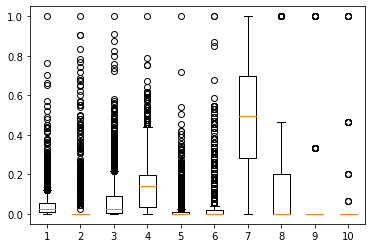

In [52]:
plt.boxplot(df)

In [53]:
import scipy.cluster.hierarchy as sch

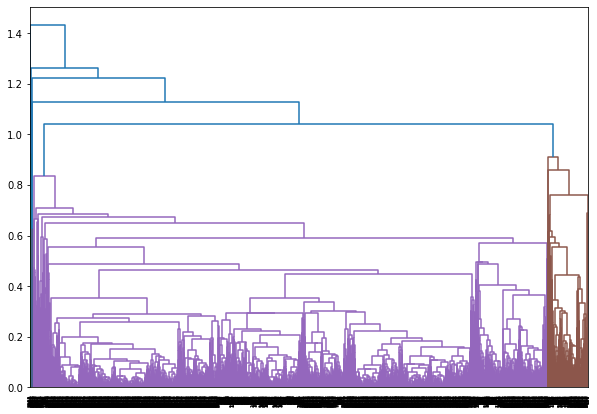

In [54]:
plt.figure(figsize=(10, 7)) 
dendrogram = sch.dendrogram(sch.linkage(df,method='average'))


In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
hc = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'average')

In [57]:
hc.fit(df)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [58]:
hc.fit_predict(df)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [59]:
y_hc = hc.fit_predict(df)

In [60]:
clusters = pd.DataFrame(y_hc, columns =['Clusters'])

In [61]:
df['h_clusterid'] = clusters

In [62]:
df.sort_values("h_clusterid")

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,h_clusterid
1999,0.191881,0.130248,0.371644,0.290698,0.011357,0.056604,0.535086,1.000000,0.0,0.0,0
3772,0.482346,0.000000,0.524618,0.302326,0.019470,0.037736,0.396190,1.000000,0.0,0.0,0
3329,0.084138,0.000000,0.221761,0.313953,0.000000,0.000000,0.269592,1.000000,0.0,0.0,0
255,0.138590,0.000000,0.233290,0.139535,0.000000,0.000000,0.888956,1.000000,0.0,0.0,0
503,0.127612,0.000000,0.370078,0.220930,0.017847,0.037736,0.805040,1.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
904,0.009288,0.000000,0.425398,0.186047,0.000000,0.000000,0.702074,0.066667,0.0,1.0,5
2364,0.063397,0.000000,0.822974,0.279070,0.000000,0.000000,0.429829,1.000000,0.0,1.0,6
275,1.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,0.000000,0.0,0.0,7
901,0.100954,0.836473,0.081089,0.267442,0.030827,0.056604,0.716422,1.000000,0.0,0.0,8


In [63]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [64]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.104641,0.014050,0.297272,0.259160,0.023546,0.041774,0.643571,0.998129,0.000000,0.004678
1,1,0.077426,0.031127,0.248912,0.805233,0.647694,0.929245,0.265041,0.233333,0.000000,0.000000
2,2,0.038083,0.012602,0.045796,0.123334,0.013248,0.022937,0.485475,0.103947,0.002535,0.000670
3,3,0.102771,0.048044,0.254468,0.590698,0.207788,0.411321,0.236532,0.680000,0.000000,0.000000
4,4,0.030637,0.005980,0.077405,0.220155,0.022477,0.060377,0.491142,0.000000,1.000000,0.000000
5,5,0.037025,0.000000,0.378506,0.264535,0.008924,0.014151,0.503888,0.250000,0.000000,1.000000
6,6,0.063397,0.000000,0.822974,0.279070,0.000000,0.000000,0.429829,1.000000,0.000000,1.000000
7,7,1.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,0.000000,0.000000,0.000000
8,8,0.100954,0.836473,0.081089,0.267442,0.030827,0.056604,0.716422,1.000000,0.000000,0.000000


In [691]:
# Hierarchial clustering is not ideal for large amount of data

In [65]:
df.corr()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,h_clusterid
Balance,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129,0.352961,-0.010421,0.025038,-0.224822
Qual_miles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312,0.014876,-0.012091,-0.008298,0.024164
Bonus_miles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397,0.874995,-0.000391,0.197166,-0.573298
Bonus_trans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262,0.535631,0.061528,0.080448,-0.254974
Flight_miles_12mo,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271,0.059476,0.010881,-0.003533,-0.053375
Flight_trans_12,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260,0.068057,0.029751,-0.003643,-0.045820
Days_since_enroll,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000,0.223963,-0.004653,0.006788,-0.146217
cc1_miles,0.352961,0.014876,0.874995,0.535631,0.059476,0.068057,0.223963,1.000000,-0.051369,0.053456,-0.730527
cc2_miles,-0.010421,-0.012091,-0.000391,0.061528,0.010881,0.029751,-0.004653,-0.051369,1.000000,-0.004971,0.215827
cc3_miles,0.025038,-0.008298,0.197166,0.080448,-0.003533,-0.003643,0.006788,0.053456,-0.004971,1.000000,0.157178


In [66]:
import seaborn as sb

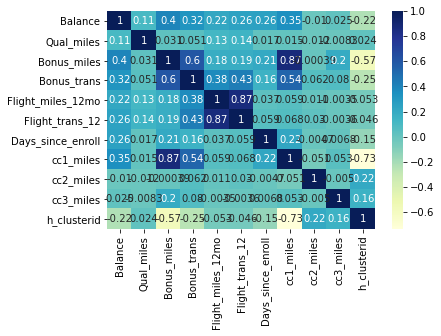

In [67]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [625]:
#Kmeans

In [288]:
from sklearn.cluster import KMeans

In [289]:
wess= []
a = range(1,13)

In [290]:
for i in a:
    k = KMeans(n_clusters=i, random_state = 0)
    k.fit(dfk)
    wess.append(k.inertia_)

In [291]:
wess

[731.9781818784443,
 447.2677974304906,
 302.7625304297618,
 244.4858201533592,
 215.36322011365684,
 195.70119969734412,
 182.100117142571,
 170.56203976650073,
 159.35687028330216,
 146.5835321090962,
 136.95998469571273,
 127.68582463652447]

In [292]:
from matplotlib import pyplot as plt

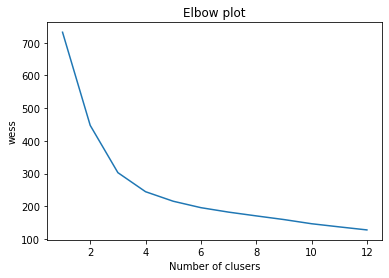

In [293]:
plt.plot(a,wess)
plt.title('Elbow plot')
plt.xlabel('Number of clusers')
plt.ylabel('wess')
plt.show()

In [890]:
#taking k =4, last elbow

In [294]:
kmeans = KMeans(4,random_state =42)

In [295]:
kmeans.fit(dfk)

KMeans(n_clusters=4, random_state=42)

In [296]:
#creating scatter plot to visualise the Kmeans clusters

In [297]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(2)
dfk1 = pca.fit_transform(dfk)
dfk1.shape


(3999, 2)

In [298]:
k = KMeans(n_clusters= 4,random_state =42)
label = k.fit_predict(dfk)

In [299]:
u_labels = np.unique(label)
u_labels

array([0, 1, 2, 3])

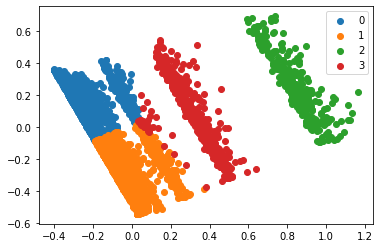

In [300]:
for i in u_labels:
    plt.scatter(dfk1[label == i , 0] , dfk1[label == i , 1] , label = i)
    
    
plt.legend()
plt.show()



In [81]:
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 3])

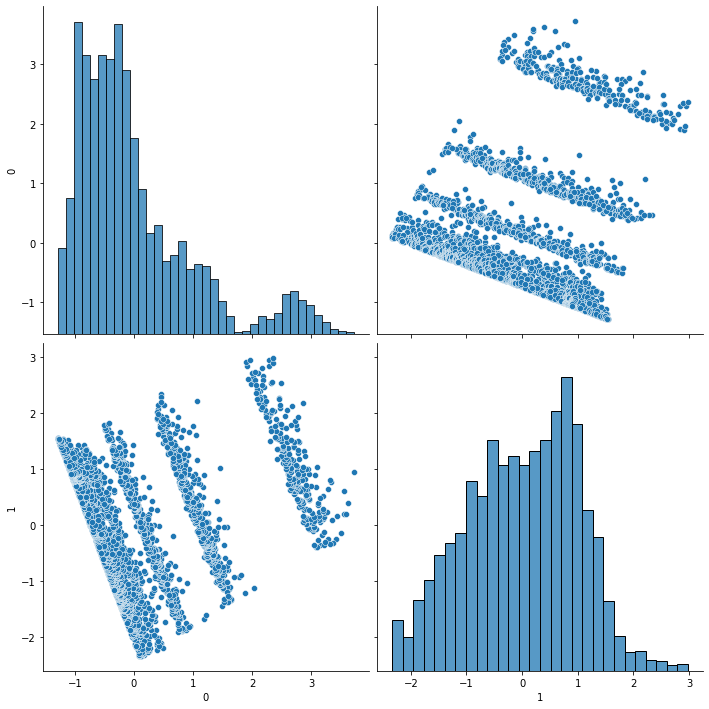

In [82]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
st = StandardScaler()
stdDf = pd.DataFrame(st.fit_transform(dfk1))
sns.pairplot(stdDf, height=5);


In [83]:
dfk['K_cluster']= kmeans.labels_

In [84]:
data2['K_cluster']= kmeans.labels_

In [85]:
dfk.sort_values('K_cluster')

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,K_cluster
0,0.016508,0.000000,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.0,0.0,0
1031,0.066683,0.000000,0.044830,0.139535,0.000000,0.000000,0.695804,0.2,0.0,0.0,0
1030,0.025414,0.000000,0.004172,0.081395,0.035695,0.132075,0.696166,0.0,0.0,0.0,0
1029,0.031313,0.000000,0.064118,0.139535,0.000000,0.000000,0.696407,0.2,0.0,0.0,0
1028,0.022065,0.000000,0.065931,0.081395,0.000000,0.000000,0.701230,0.2,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2763,0.029714,0.150161,0.006068,0.034884,0.016225,0.018868,0.261876,0.0,0.0,0.0,3
2762,0.009951,0.148098,0.009386,0.151163,0.000000,0.000000,0.262841,0.0,0.0,0.0,3
2760,0.165981,0.000000,0.021920,0.186047,0.009735,0.056604,0.264046,0.0,0.0,0.0,3
2774,0.042524,0.000000,0.092076,0.151163,0.000000,0.000000,0.260309,0.2,0.0,0.0,3


In [86]:
dfk.groupby('K_cluster').agg(['mean']).reset_index()

,K_cluster,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.042918,0.013627,0.030915,0.112758,0.014430,0.025478,0.701810,0.049186,0.007571,0.000872
1,1,0.103872,0.017331,0.297507,0.261022,0.024895,0.044353,0.638713,1.000000,0.000000,0.008102
2,2,0.065680,0.015378,0.151651,0.234642,0.020436,0.035470,0.567989,0.450896,0.000597,0.006691
3,3,0.025718,0.010779,0.026349,0.099733,0.011859,0.020033,0.273062,0.037333,0.007647,0.000863


In [87]:
df.mean()

Balance              0.043172
Qual_miles           0.012927
Bonus_miles          0.065020
Bonus_trans          0.134906
Flight_miles_12mo    0.014929
Flight_trans_12      0.025917
Days_since_enroll    0.496330
cc1_miles            0.168676
cc2_miles            0.006085
cc3_miles            0.002201
h_clusterid          1.873718
dtype: float64

In [88]:
data2.groupby('K_cluster').agg(['mean']).reset_index()

,K_cluster,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,73167.772884,151.918100,8151.782519,9.697178,444.693049,1.350310,5822.811425,6188.919477,2613.558156,2565.381968
1,1,177084.142361,193.204861,78448.045139,22.447917,767.201389,2.350694,5299.489583,77500.000000,2500.000000,3107.638889
2,2,111973.928315,171.439068,39987.974910,20.179211,629.768817,1.879928,4712.901434,36317.204301,2508.960573,3001.792115
3,3,43845.441176,120.159412,6947.866471,8.577059,365.446471,1.061765,2266.777647,5300.000000,2614.705882,2564.705882


In [780]:
# finding eps and min samples

In [641]:
#using nearestneighbour to calculate the distance of the nearest neightbour of each point

In [255]:
from sklearn.neighbors import NearestNeighbors

In [256]:
import numpy as np

In [257]:
neigh = NearestNeighbors(n_neighbors=2)

In [258]:
dfd.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.000000,0.0,0.0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.000000,0.0,0.0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.000000,0.0,0.0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.000000,0.0,0.0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0.466667,0.0,0.0


In [259]:
nbrs = neigh.fit(dfd)

In [260]:
distances, indices = nbrs.kneighbors(dfd)

In [261]:
distances = np.sort(distances, axis=0)

In [262]:
distances

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.11447539e-04],
       ...,
       [0.00000000e+00, 5.99325979e-01],
       [0.00000000e+00, 6.34265098e-01],
       [0.00000000e+00, 6.88672401e-01]])

In [263]:
distances = distances[:,1]

In [264]:
distances

array([0.00000000e+00, 0.00000000e+00, 1.11447539e-04, ...,
       5.99325979e-01, 6.34265098e-01, 6.88672401e-01])

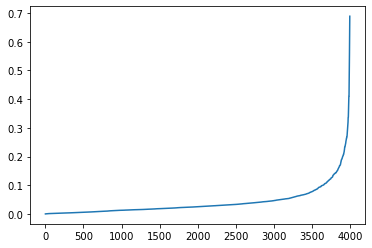

In [265]:
plt.plot(distances)

In [239]:
dfd

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,x_component,y_component
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.000000,0.0,0.0,-0.517892,54.740452
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.000000,0.0,0.0,-1.015270,54.429821
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.000000,0.0,0.0,-1.477046,50.666157
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.000000,0.0,0.0,-1.001907,55.216316
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0.466667,0.0,0.0,43.809677,37.170013
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0.000000,0.0,0.0,-27.757168,-38.375450
3995,0.037766,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0.000000,0.0,0.0,-27.277197,-36.722488
3996,0.043169,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,0.200000,0.0,0.0,24.186010,-45.776958
3997,0.032202,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.000000,0.0,0.0,-33.701530,-47.485413


In [266]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [304]:
db = DBSCAN(eps=.5, min_samples=20).fit(dfd)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [305]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [306]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [273]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 28
Silhouette Coefficient: 0.489


In [274]:
#eps at .5 and min_samples at 20 gives the best Silhouette Coefficient, after checking

In [275]:
  
dbscan = DBSCAN(eps=.5 , min_samples=20 )

In [276]:
dbscan.fit(dfd)

DBSCAN(min_samples=20)

In [277]:
#visualising using tSNE and scatter plot

In [278]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(dfd)

In [279]:
dfd["x_component"]=X_embedded[:,0]
dfd["y_component"]=X_embedded[:,1]

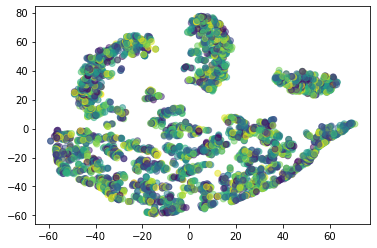

In [280]:
N = 3999
x = dfd["x_component"]
y = dfd["y_component"]
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()


In [281]:
c = pd.DataFrame(dbscan.labels_, columns=['D_cluster'])

In [282]:
dfd['D_cluster'] = c
data2['D_cluster'] = c

In [283]:
dfd.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,x_component,y_component,D_cluster
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.000000,0.0,0.0,-55.988945,-18.212488,0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.000000,0.0,0.0,-55.400764,-18.501213,0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.000000,0.0,0.0,-52.179447,-17.715904,0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.000000,0.0,0.0,-56.167210,-18.868153,0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0.466667,0.0,0.0,4.594168,35.639587,0


In [284]:
dfd.groupby('D_cluster').agg(['mean']).reset_index()

,D_cluster,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,x_component,y_component
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,0.089976,0.037524,0.198834,0.322259,0.115747,0.191375,0.475309,0.147619,0.535714,0.195238,-7.106418,24.671432
1,0,0.038094,0.012616,0.046044,0.123701,0.013384,0.023220,0.485403,0.104315,0.002533,0.000543,-4.240036,-1.236138
2,1,0.104023,0.014527,0.296426,0.260937,0.024962,0.044465,0.639172,1.000000,0.000000,0.004662,50.071827,30.763948


In [285]:
data2.groupby('D_cluster').agg(['mean']).reset_index()

,D_cluster,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,K_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,153394.785714,418.321429,52429.642857,27.714286,3566.964286,10.142857,3944.214286,13571.428571,10535.714286,17142.857143,1.714286
1,0,64943.449932,140.646676,12140.993487,10.638263,412.451560,1.230665,4027.934600,10323.609227,2537.991859,2540.705563,1.674355
2,1,177342.804196,161.951049,78163.108392,22.440559,769.244755,2.356643,5303.293706,77500.000000,2500.000000,2849.650350,1.000000


In [307]:
data2.mean()

Balance              73601.327582
Qual_miles             144.114529
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
cc1_miles            15150.662666
cc2_miles             2591.272818
cc3_miles             2665.041260
K_cluster                1.626407
D_cluster                0.064516
dtype: float64

In [817]:
#insights

In [ ]:
#There are 2 clusteres formed using DBSCAN, there is also large amount of noise in the data

In [ ]:
#by comparing the mean with the two clusters, we can infer that there are two type of customers that the airline gets

In [308]:
#The cluster 0, 
#has customers that have relatively lower aggriate of earning and usage of frequent flyer reward and airline credit card

In [ ]:
#The customers who form the second cluster(1) uses more rewards and airline credit card, these customers also fly the most